In [ ]:
import selene_sdk

In [ ]:
%matplotlib inline

from selene_sdk.utils import load_path
from selene_sdk.utils import parse_configs_and_run

In [ ]:
configs = load_path("training_Pum2.yml")

In [ ]:
parse_configs_and_run(configs)

In [ ]:
from itertools import product

letters = ['A', 'G', 'C', 'T']
result = list(product(letters, repeat=8))

#for perm in result:
 #   print(''.join(perm))


In [ ]:
import numpy as np

array = np.random.choice(letters, size=(2,21))
line1 = ''.join(array[0])
line2 = ''.join(array[1])
mylist = []
for i in range(len(result)):
    position = ">"
    position = position + ''.join(result[i])
    mylist.append(position)
    mystring = line1 + ''.join(result[i]) + line2
    mylist.append(mystring)

print(mylist[1])

CACCGAGCTCCTAAGGGTTACAAAAAAAACCTCTGGTGACAAAGCCTGAT


In [ ]:
mylist = []
position = ">TGTAAATA"
#position = position + 'TGTAAATA'
mylist.append(position)
mystring = "TGTAAATA"
mylist.append(mystring)



In [ ]:
text_file = open("sequences.fa", "w")
for i in mylist:
    text_file.write(i + '\n')
text_file.close()

In [2]:
import sys
sys.path.insert(0, '/content/lua.py')
import lua

ModuleNotFoundError: ignored

In [1]:
from deeper import DeeperDeepSEA

In [2]:
from selene_sdk.predict import AnalyzeSequences
from selene_sdk.sequences import Genome
from selene_sdk.utils import load_features_list
from selene_sdk.utils import NonStrandSpecific
#from selene_sdk.utils import DeeperDeepSEA

In [3]:
distinct_features = load_features_list("./PUM2/distinct_features.txt")

model_predict = AnalyzeSequences(
    NonStrandSpecific(DeeperDeepSEA(50, 1)),
    "/home/mo/Downloads/PUM2/training_outputs/best_model.pth.tar",
    sequence_length=50,
    features=distinct_features,
    reference_sequence=Genome("/home/mo/Downloads/GRCh38.primary_assembly.genome.fa"),
    use_cuda=True,
    data_parallel= True # update this to False if you do not have CUDA on your machine.
)

In [4]:
import os

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

In [ ]:
import sys
sys.path.insert(0,'/home/mo/Downloads/PUM2')
import 

In [8]:

model_predict.in_silico_mutagenesis_from_file(
    "sequences.fa",
    save_data=["logits"],
    output_dir="./regulatory_mutations_output"
)

output_files = os.listdir("./regulatory_mutations_output")
print("Output filenames: {0}".format(output_files))

Output filenames: ['TGTAAATA_logits.tsv']


In [9]:
import matplotlib.pyplot as plt
import numpy as np

from selene_sdk.interpret import heatmap
from selene_sdk.interpret import ISMResult

Exception ignored in: <function Faidx.__del__ at 0x7f5cd99f1b80>
Traceback (most recent call last):
  File "/home/mo/.local/lib/python3.8/site-packages/pyfaidx/__init__.py", line 889, in __del__
    self.__exit__()
  File "/home/mo/.local/lib/python3.8/site-packages/pyfaidx/__init__.py", line 895, in __exit__
    self.file.close()
AttributeError: 'Faidx' object has no attribute 'file'


In [10]:
known_TGTAAATA_mutation = ISMResult.from_file(
    os.path.join("regulatory_mutations_output", "TGTAAATA_logits.tsv"))

In [11]:
def _get_features_containing_str(feature_substring):
    features = []
    for feature in distinct_features:
        if feature_substring in feature:
            features.append(feature)
    return features

def _get_scores(ism_result, visualize_features, start, end):
    matrices = []
    for f in visualize_features:
        score_matrix = ism_result.get_score_matrix_for(f)
        matrices.append(score_matrix[start:end,])
    return matrices

def visualize(ism_result, target, start=0, end=50):
    """
    Parameters
    ----------
    ism_result : selene.interpret.ISMResult
        Output of `ISMResult.from_file` from an output file.
    target : str
        Pass in a feature name. If you want to visualize multiple features
        that share the same substring, pass in that substring.
    start : int
        Starting position for the heatmap visualization.
    end : int
        Ending position for the heatmap visualization.

    """
    target_features = _get_features_containing_str(target)
    matrices = _get_scores(ism_result, target_features, start, end)
    reference_encoding = Genome.sequence_to_encoding(
        ism_result.reference_sequence)[start:end,] == 1.
    for ix, m in enumerate(matrices):
        figure, (ax) = plt.subplots(1, 1, figsize=(24, 4))
        ax.patch.set(edgecolor="gray", hatch="//")
        ax.set_title("Feature {0}".format(target_features[ix]))

        # Set the min and max for the colorbar so that it is centered at 0.
        colorbar_bound = max(np.max(m), np.abs(np.min(m)))

        heatmap(m, mask=reference_encoding,
                cbar=True,
                cmap="bwr",
                vmin=-1 * colorbar_bound,
                vmax=colorbar_bound,
                ax=ax,
                linewidth=0.5,
                xticklabels=list(range(start, end)))

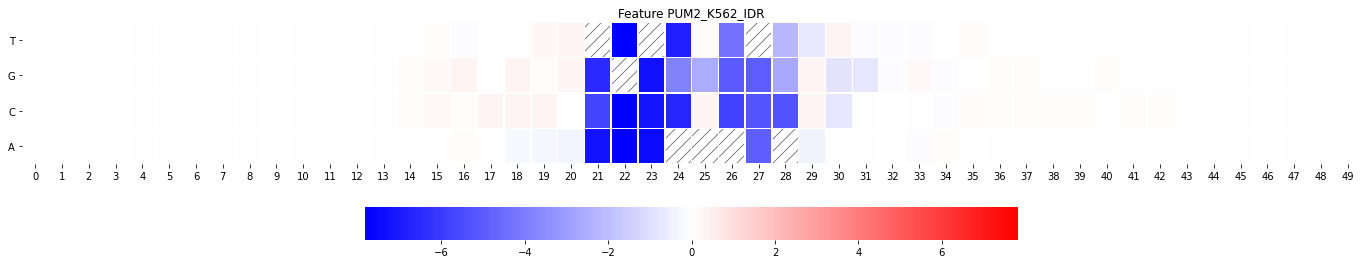

In [12]:
visualize(known_TGTAAATA_mutation, "PUM2")#, start =0, end =50)

# Other Insilico

In [13]:
model_predict.in_silico_mutagenesis_from_file("sequences.fa", #fasta file with sequences for comparison
                                         save_data=["abs_diffs", "logits", "predictions"],
                                         output_dir=".",
                                         use_sequence_name=False)

In [14]:
from selene_sdk.interpret import ISMResult

ism = ISMResult.from_file("0_predictions.tsv")

In [15]:
score_matrix = ism.get_score_matrix_for("PUM2_K562_IDR")[:50,]

<AxesSubplot:>

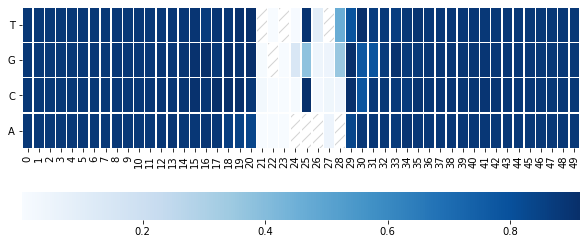

In [16]:
import matplotlib.pyplot as plt
import selene_sdk.interpret
from selene_sdk.sequences import Genome

reference_encoding = Genome.sequence_to_encoding(ism.reference_sequence)[:50,] == 1.
figure, (ax) = plt.subplots(1, 1, figsize=(10, 4))
ax.patch.set(edgecolor="lightgrey", hatch="//")
selene_sdk.interpret.heatmap(score_matrix, mask=reference_encoding, cbar=True, ax=ax, linewidth=0.5)

<AxesSubplot:>

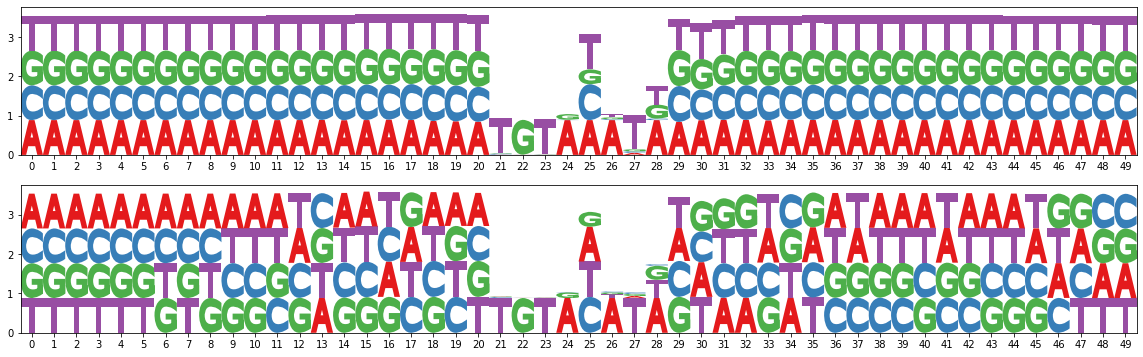

In [17]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 6))
selene_sdk.interpret.sequence_logo(score_matrix, order="alpha", ax=ax1)
selene_sdk.interpret.sequence_logo(score_matrix, order="value", ax=ax2)

<AxesSubplot:>

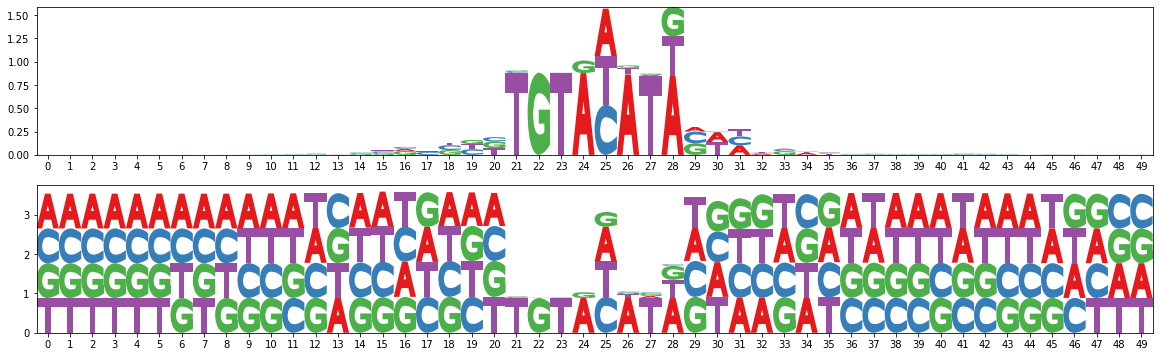

In [18]:
rescaled_score_matrix = selene_sdk.interpret.rescale_score_matrix(score_matrix, base_scaling="max_effect")
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 6))
selene_sdk.interpret.sequence_logo(rescaled_score_matrix, ax=ax1)
selene_sdk.interpret.sequence_logo(score_matrix, ax=ax2)

# Comparison of Sequences

In [20]:
import numpy as np
from itertools import product

letters = ['A', 'G', 'C', 'T']
result = list(product(letters, repeat=8))
array = np.random.choice(letters, size=(2,21))
line1 = ''.join(array[0])
line2 = ''.join(array[1])
mylist = []
for i in range(len(result)):
    position = ">"
    position = position + ''.join(result[i])
    mylist.append(position)
    mystring = line1 + ''.join(result[i]) + line2
    mylist.append(mystring)

Exception ignored in: <function Faidx.__del__ at 0x7f5cd99f1b80>
Traceback (most recent call last):
  File "/home/mo/.local/lib/python3.8/site-packages/pyfaidx/__init__.py", line 889, in __del__
    self.__exit__()
  File "/home/mo/.local/lib/python3.8/site-packages/pyfaidx/__init__.py", line 895, in __exit__
    self.file.close()
AttributeError: 'Faidx' object has no attribute 'file'


In [21]:
text_file = open("comparison.fa", "w")
for i in mylist:
    text_file.write(i + '\n')
text_file.close()

In [ ]:
mylist = []
position = ">TGTAAATA"
#position = position + 'TGTAAATA'
mylist.append(position)
mystring = "TGTAAATA"
mylist.append(mystring)


In [ ]:
text_file = open("sequences.fa", "w")
for i in mylist:
    text_file.write(i + '\n')
text_file.close()

In [22]:
model_predict.get_predictions("comparison.fa", output_dir="./PUM2/variant_practice")